## Author: Dheeraj Nemalikanti

In [1]:
#first we import the required the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#now we read the data using pandas
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#from the above table we observe that the 'Id' column is not required so we d
df = df.drop(['Id'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f75a3fb00>,
      dtype=object)

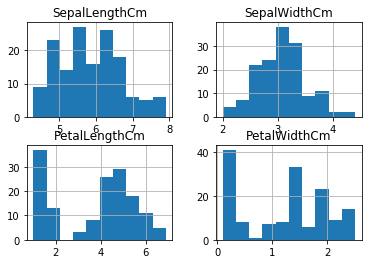

In [13]:
df.hist()

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
x = df.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
#now applying the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
Within_Cluster_Sum_of_Squares = []
for i in range(1,11):
    #‘k-means++’: selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
    #'max_iter ': Maximum number of iterations of the k-means algorithm for a single run
    kmeans = KMeans(n_clusters=i,init = 'k-means++',max_iter = 300,n_init = 10, random_state=0).fit(x)
    #now we append Sum of squared distances of samples to their closest cluster center
    Within_Cluster_Sum_of_Squares.append(kmeans.inertia_)

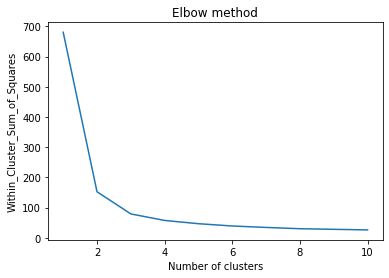

In [10]:
#now we will plot the results so that we can observe the elbow
plt.plot(range(1, 11), Within_Cluster_Sum_of_Squares)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within_Cluster_Sum_of_Squares') # Within cluster sum of squares
plt.show()

In [11]:
#from the above graph we can decide the optimum number of clusters
#we get optimum number of clusters at a point where the 'y coordinate doesn't decrease sigificantly
#hence we can safely choose 3 clusters as optimal number of clusters

In [12]:
#now applying the kmeans algorithm to our given dataset
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter = 300,n_init = 10, random_state=0)
pred_ = kmeans.fit_predict(x)

In [16]:
#now we will visualise the clusters
pred_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [17]:
kmeans.cluster_centers_[:, 0]

array([6.85     , 5.006    , 5.9016129])

In [18]:
kmeans.cluster_centers_[:,1]

array([3.07368421, 3.418     , 2.7483871 ])

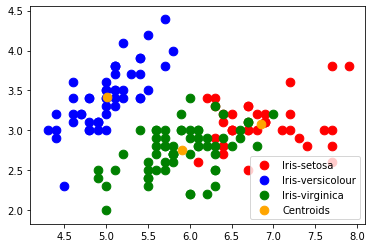

In [22]:
plt.scatter(x[pred_==0,0],x[pred_==0,1],s=75,c='red',label = 'Iris-setosa')
plt.scatter(x[pred_==1,0],x[pred_==1,1],s=75,c='blue',label = 'Iris-versicolour')
plt.scatter(x[pred_==2,0],x[pred_==2,1],s=75,c='green',label = 'Iris-virginica')
#now plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 75, c = 'orange', label = 'Centroids')
plt.legend()

## End